In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data from the space-delimited input file
data = np.loadtxt('jumps.dat')

# Call the first column x (day number) and the second column y (delta RMS)
# The input column x should be the Modified Julian Day - 59730.
x = data[:, 0]
y = data[:, 1]

# Set the start and end of the historical record examined in the Technical Memo
# (Beginning of June 3, 2022 through end of December 6, 2024)
xstart =   3.0
# xend   = 921.0 

# Set instead the end data that corresponds to the latest update made to jumps.dat (May 6, 2025)
xend = 1071.5

In [3]:
# Set the bin limits, with bin size = 10
bins=np.arange(0, 101, 10)
# Note: because of this bin choice, large jumps beyind 60 nm are excluded from
# the frequency analysis

# Also create arrays with slight shifts for plotting without overlaps
binshift1 = bins - 0.0
binshift2 = bins - 0.5
binshift3 = bins + 0.5

In [4]:
# help(plt.hist)

In [5]:
# Select all values in the historical record
y1 = y[(x > xstart) & (x < xend)]
# Create the frequency array, set linewidth=0 so that no histogram is plotted
counts1, bins = np.histogram(y1, bins)
# Divide the frequencies (counts) by the number of years covered by the date range examined
counts1 = counts1 / ((xend-xstart)/365.24)

# Select values in the last 2 years of the historical record
xstart2 = xend - (2.0*365.24)
y2 = y[(x > xstart2) & (x < xend)]
# Create the frequency array, set linewidth=0 so that no histogram is plotted
counts2, bins = np.histogram(y2, bins)  
# Divide the frequencies (counts) by the number of years
counts2 = counts2 / 2.0

# Select values in the last z3 years of the historical record
z3 = 1.0
# Note: the plot in the Tech Memo uses 8 months instead
# z3 = 2.0/3.0
xstart3 = xend - (z3*365.24)
y3 = y[(x > xstart3) & (x < xend)]
# Create the frequency array, set linewidth=0 so that no histogram is plotted
counts3, bins = np.histogram(y3, bins)
# Divide the frequencies (counts) by the number of years
counts3 = counts3 / z3

In [6]:
# Calculate the total number of jumps per year for the full record, the last 2 years, and the 
# last z3 years
print(sum(counts1),sum(counts2),sum(counts3))

7.520149742629855 5.5 4.0


In [7]:
# Calculate the total jump in nm/yr for the full record, the last 2 years, and the
# last z3 years, but exclude jumps larger than 100 nm.

ysmall  = y[(y <= 100) & (x > xstart)  & (x < xend)]
y2small = y[(y <= 100) & (x > xstart2) & (x < xend)]
y3small = y[(y <= 100) & (x > xstart3) & (x < xend)]

print(sum(ysmall)/((xend-xstart)/365.24), sum(y2small)/2.0, sum(y3small)/z3)

168.59833897987835 133.355 35.75


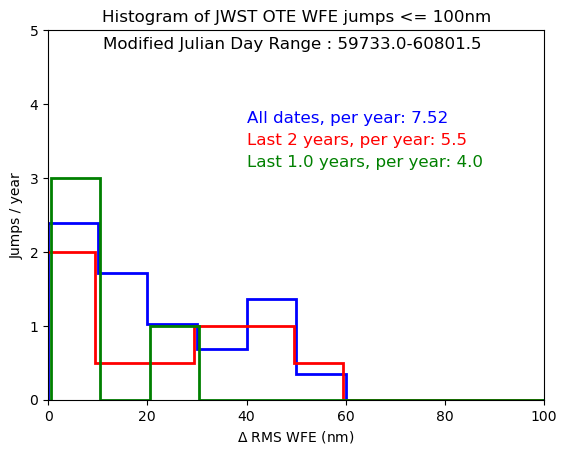

In [8]:
# Set the x-axis limit from 0 to 100
plt.xlim(0, 100)
# Limit y-axis range from 0 to 5
plt.ylim(0, 5)   

plt.xlabel(r'$\Delta$ RMS WFE (nm)')
plt.ylabel('Jumps / year')
plt.title('Histogram of JWST OTE WFE jumps <= 100nm')

# Plot the histograms 
plt.stairs(counts1, binshift1, color='blue', linewidth=2)
plt.stairs(counts2, binshift2, color='red', linewidth=2)
plt.stairs(counts3, binshift3, color='green', linewidth=2)

# Add labels
mjd1 = 59730 + xstart 
mjd2 = 59730 + xend
plt.text(11, 4.75, 'Modified Julian Day Range : '+str(mjd1)[:8]+'-'+str(mjd2)[:8], fontsize=12, color='black')
plt.text(40, 3.75, 'All dates, per year: '+str(sum(counts1))[:4], fontsize=12, color='blue')
plt.text(40, 3.45, 'Last 2 years, per year: '+str(sum(counts2))[:4], fontsize=12, color='red')
plt.text(40, 3.15, 'Last '+str(z3)[:4]+' years, per year: '+str(sum(counts3))[:4], fontsize=12, color='green')

# save to jpg file
plt.savefig('jumps_histograms.jpg')